# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 72.0MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
#to show each columns if there is many
pd.set_option('display.max_columns', None)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [9]:
df.head(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,10/16/2015 07:20:00 AM,10/28/2015 09:38:00 AM,NaN,ACME BUS CORP. (B2321),15mins,3,Yes,Yes,Yes,10/28/2015 09:38:00 AM,NaN,10/28/2015 09:38:12 AM,Running Late,School-Age
6,2015-2016,1226116,Pre-K/EI,9304,4,Heavy Traffic,C353,10/29/2015 08:09:00 AM,10/29/2015 08:11:00 AM,Bronx,"G.V.C., LTD.",20MIN,3,Yes,Yes,Yes,10/29/2015 08:11:00 AM,NaN,10/29/2015 08:11:28 AM,Running Late,Pre-K
7,2015-2016,1214953,Pre-K/EI,GV0365,3,Heavy Traffic,C579,09/16/2015 07:57:00 AM,09/16/2015 07:58:00 AM,Bronx,"G.V.C., LTD.",10MIN,4,Yes,Yes,No,09/16/2015 07:58:00 AM,NaN,09/16/2015 07:58:19 AM,Running Late,Pre-K
8,2015-2016,1215730,Special Ed AM Run,5628D,Q363,Heavy Traffic,26177,09/18/2015 07:50:00 AM,09/18/2015 07:04:00 AM,Queens,LORINDA ENT. LTD.,45MINS,0,Yes,Yes,No,09/18/2015 07:04:00 AM,NaN,09/18/2015 07:04:29 AM,Running Late,School-Age
9,2015-2016,1226326,Pre-K/EI,0003,03 AM,Other,C494,10/30/2015 06:30:00 AM,10/30/2015 06:57:00 AM,Brooklyn,L & M BUS CORP.,35 Minutes,0,Yes,Yes,No,10/30/2015 06:57:00 AM,NaN,10/30/2015 06:57:13 AM,Running Late,Pre-K


In [10]:
df['Number_Of_Students_On_The_Bus'].unique()

array([   5,    3,   12,   11,    4,    0,    2,    1,    6,   15,   18,
          8,    7,   13,   20,    9,   14,   23,   10,   50,   22, 1492,
         19,   25,   17,   26,   44,   27,   31, 1424,   16,   30,   46,
        207,  102, 1011,   21, 1401,   28,   33, 1371,   37,   76,   52,
         40,   24,   51, 1465, 1329,   32,   65,   29, 1472,   47,   35,
       1315, 1749,   43, 1420, 1352, 1500,   60,   45, 1449,   41,  500,
       2368,  138,  156, 9007, 2154,   36,   55, 2312, 4802,   38,   42,
         48, 2045,  430,  610, 5554, 3112, 2680,   49, 2844,   39,   34,
       4533,   63, 6219, 2252, 1240,   66,   53, 2085,   54,  105, 2905,
        209,  157,  172, 2365,   58, 1177,   81,  612,  109,  331, 1331,
         91, 2063, 1402, 1434, 1411, 5718, 2550, 2327, 6209, 2346, 1384,
        280, 2855])

In [11]:
df.shape

(147972, 21)

In [12]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [13]:
df.duplicated().sum()

0

<Axes: xlabel='School_Year', ylabel='count'>

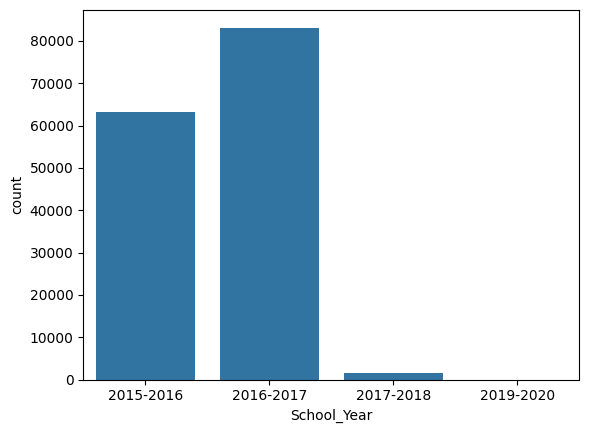

In [14]:
sns.countplot(df,x='School_Year')


<Axes: xlabel='Run_Type', ylabel='count'>

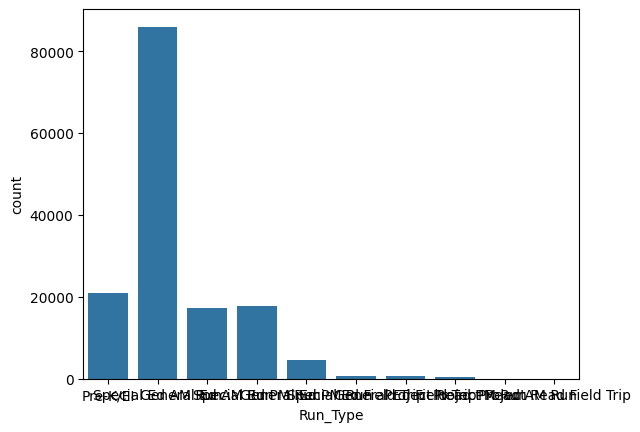

In [15]:
sns.countplot(df,x='Run_Type')

<Axes: xlabel='Reason', ylabel='count'>

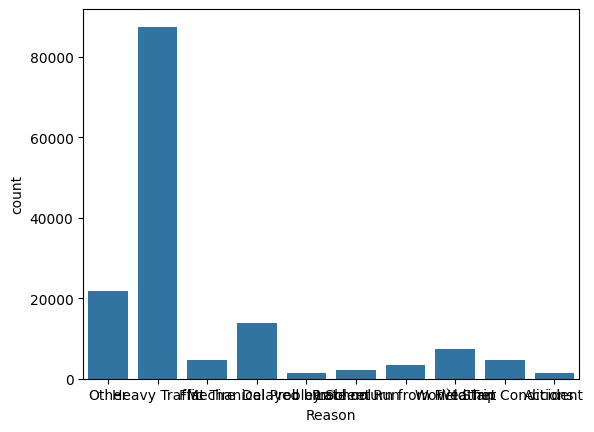

In [16]:
sns.countplot(df,x='Reason')

<Axes: xlabel='Boro', ylabel='count'>

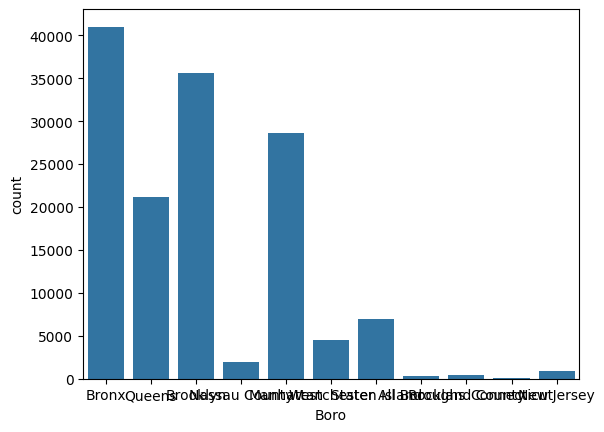

In [17]:
sns.countplot(df, x='Boro')

<Axes: xlabel='School_Age_or_PreK', ylabel='count'>

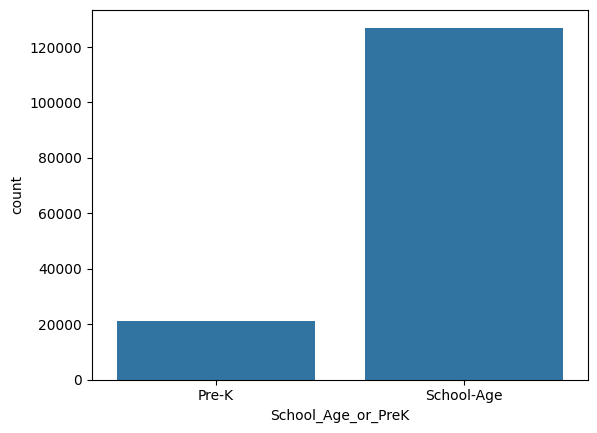

In [18]:
sns.countplot(df, x='School_Age_or_PreK')

<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

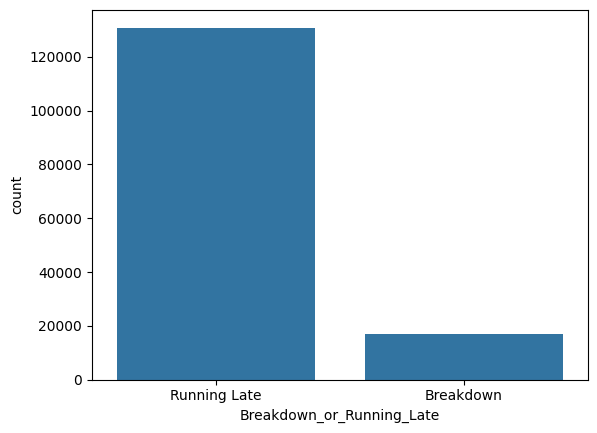

In [20]:
sns.countplot(df, x='Breakdown_or_Running_Late')

In [21]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


<Axes: >

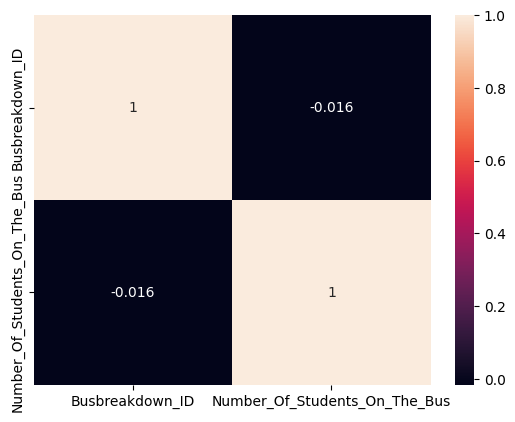

In [22]:
sns.heatmap(data = corr_matrix, annot=True)

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [28]:
df.drop('Incident_Number',inplace=True,axis=1)
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
for col in cat_cols:
  #print(col,':',df[col].mode()[0]) # to check if there's a column mode = nan
  df[col].fillna(df[col].mode()[0],inplace=True)

KeyError: "['Incident_Number'] not found in axis"

In [25]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [30]:

def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in num_cols:
 df = remove_outliers(df, col)

In [31]:
for col in cat_cols:
  print(col,'', df[col].unique())

School_Year  ['2015-2016' '2016-2017' '2017-2018' '2019-2020']
Run_Type  ['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip'
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Bus_No  ['811' '9302' '12568' ... 'GVC510' '0336' 'K9345']
Route_Number  ['1' 'P640' '4' ... '012' '29AM' '1409B']
Reason  ['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Won`t Start'
 'Late return from Field Trip' 'Weather Conditions' 'Accident']
Schools_Serviced  ['C353' 'C814' '24071' ... '02654, 02721,' '04377, 04454, 04658' 'C121B']
Occurred_On  ['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '10/16/2015 07:20:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On  ['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '10/28/2015 09:38:00 AM' ... '05/25/2017 04:28:00 PM'
 '05/25/2017 04:30:00 PM' '05/25/2017 0

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [33]:
nominal = cat_cols.drop(['School_Year', 'How_Long_Delayed','Breakdown_or_Running_Late'])
ordinal =df[['School_Year', 'How_Long_Delayed']].columns

In [34]:
print(nominal)

Index(['Run_Type', 'Bus_No', 'Route_Number', 'Reason', 'Schools_Serviced',
       'Occurred_On', 'Created_On', 'Boro', 'Bus_Company_Name',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'School_Age_or_PreK'],
      dtype='object')


In [36]:
encode_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])


col_trans = ColumnTransformer([
    ('onehot', encode_pipe, cat_cols.drop('Breakdown_or_Running_Late')),
    ('num', num_pipe, num_cols)
])


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('Breakdown_or_Running_Late',axis =1)
y = df['Breakdown_or_Running_Late']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=41)

In [40]:
X_train = col_trans.fit_transform(X_train)
X_val = col_trans.transform(X_val)
X_test = col_trans.transform(X_test)


unique_labels = np.unique(np.concatenate([y_train, y_val, y_test])) # i get error for unknown category

le = LabelEncoder()
le.fit(unique_labels)

y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [41]:
y = LabelEncoder().fit_transform(y)

In [43]:
print(X_train)

[[0.00000000e+00 3.00000000e+00 1.80000000e+01 ... 0.00000000e+00
  2.47488694e-01 2.85714286e-01]
 [0.00000000e+00 9.00000000e+00 5.91300000e+03 ... 1.00000000e+00
  4.06958285e-01 0.00000000e+00]
 [1.00000000e+00 9.00000000e+00 7.89100000e+03 ... 1.00000000e+00
  5.93602006e-01 0.00000000e+00]
 ...
 [0.00000000e+00 7.00000000e+00 1.24100000e+03 ... 1.00000000e+00
  4.17483758e-02 2.85714286e-01]
 [0.00000000e+00 0.00000000e+00 6.13000000e+02 ... 1.00000000e+00
  2.39778018e-01 0.00000000e+00]
 [1.00000000e+00 7.00000000e+00 1.61200000e+03 ... 1.00000000e+00
  6.57842078e-01 0.00000000e+00]]


In [44]:
count = np.unique(y_train,  return_counts = True)

print(count)

(array([0, 1]), array([10397, 74124]))


In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [48]:
count = np.unique(y_train,  return_counts = True)

print(count) #now labels are balanced

(array([0, 1]), array([74124, 74124]))


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [49]:
#ANN Arch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([

    Dense(units=4, activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

## Training the Model
Train the ANN model using the training data.

In [50]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [51]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [52]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['f1_score'])
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
hist = model.fit(X_train,y_train,epochs= 20, validation_data=(X_val, y_val))

Epoch 1/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - f1_score: 0.6267 - loss: 331.0618 - val_f1_score: 0.0251 - val_loss: nan
Epoch 2/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - f1_score: 0.6662 - loss: 1.0285 - val_f1_score: 0.0251 - val_loss: nan
Epoch 3/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - f1_score: 0.6655 - loss: 0.6881 - val_f1_score: 0.0251 - val_loss: nan
Epoch 4/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - f1_score: 0.6660 - loss: 0.6870 - val_f1_score: 0.0251 - val_loss: nan
Epoch 5/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - f1_score: 0.6656 - loss: 0.6910 - val_f1_score: 0.0251 - val_loss: nan
Epoch 6/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - f1_score: 0.6668 - loss: 0.6917 - val_f1_score: 0.0251 - val_loss: nan
Epoch 7/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - f1_score: 0.6683 - loss: 0.6907 - val_f1_score: 0.0251 - val_loss: nan
Epoch 8/20
4633/4633 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - f1_score: 0.6646 - loss: 0.6888 - val_f1_score:

In [53]:
np.isnan(X_val).any() #hwy we have nan in valloss

True

In [54]:
y_train.shape

(148248, 1)

In [55]:
X_train.shape

(148248, 19)

In [56]:
X_val.shape

(21131, 19)

In [57]:
y_val.shape

(21131, 1)

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [61]:
# Now try evaluating the model
model.evaluate(X_test, y_test)

ValueError: Cannot take the length of shape with unknown rank.

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [59]:
y_pred = model.predict(X_test) > 0.5 # > because its two classes, if more we use argmax

826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

<Axes: >

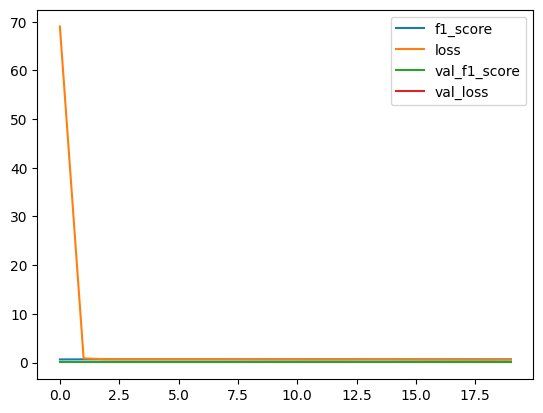

In [63]:
pd.DataFrame(hist.history).plot() #Very bad
# we can edit the hidden layers to get better result but there's no time in the exam

## Save the Model
Save the trained model for submission.

In [64]:
model.save('ExamWeek5.keras')


In [65]:
import tensorflow as tf
model2 = tf.keras.models.load_model('ExamWeek5.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- Applied MinMaxScaler for normalization to assist the ANN.
2- Used One-Hot Encoding and Ordinal Encoding initially; switched to Ordinal Encoding only due to memory issues, affecting results.
3- Built a complex model but faced time constraints; skipped batch training to speed up the process.
4- Used Adam optimizer, binary_crossentropy loss, and F1 score due to data imbalance.
5- Model underfitted due to null values in the validation set and lack of tuning.
6- Plan to fix nulls and refine the model architecture to improve performance.